In [125]:
from Utils.FS import file
from nltk.tokenize.punkt import PunktSentenceTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import brown
from scipy.sparse import coo_matrix, dok_matrix
from scipy.sparse.linalg import svds
from sklearn.preprocessing import normalize

In [71]:
sents = brown.sents()
sents = [[token.lower() for token in sent] for sent in sents]
words = brown.words()
words = [word.lower() for word in words]

In [72]:
print("Number of tokens: {}".format(len(words)))
print("Number of sentences: {}".format(len(sents)))
print("Longest sentences length: {}".format(max([len(sent) for sent in sents])))

Number of tokens: 1161192
Number of sentences: 57340
Longest sentences length: 180


In [73]:
def words2dicts(words):
    f_dict = {}
    index = 0
    for word in words:
        if not word in f_dict.keys():
            f_dict[word] = index
            index = index + 1
        
    return f_dict, { v:k for k, v in f_dict.items()}

#def sents2wordContextMatrix(sents):
    

In [74]:
a = ['a','b', 'c', 'c', 'a']
c,d = words2dicts(a)
print(c)
print(d)

{'c': 2, 'a': 0, 'b': 1}
{0: 'a', 1: 'b', 2: 'c'}


In [84]:
words_dict, inv_words_dict = words2dicts(words)
words_size = len(words_dict)
print("Number of unique tokens: {}".format(words_size))

Number of unique tokens: 49815


In [255]:
def sents2wordContextMatrix(sents, words_dict, window = 5):
    m = coo_matrix((words_size, words_size), 'float64')
    
    print('Doing forward pass...')
    back = []
    row = []
    col = []
    data = []
    for sent in sents:
        for word in sent:
            row += [words_dict[word] for b in back]
            col += [words_dict[b] for b in back]
            data += [1 for b in back]
            if len(back) == window:
                back.pop(0)
            back.append(word)
    m = m + coo_matrix((data, (row, col)), shape=(words_size, words_size))
    
    print('Doing backward pass...')
    back = []
    row = []
    col = []
    data = []
    for sent in reversed(sents):
        for word in reversed(sent):
            row += [words_dict[word] for b in back]
            col += [words_dict[b] for b in back]
            data += [1 for b in back]
            if len(back) == window:
                back.pop(0)
            back.append(word)
    m = m + coo_matrix((data, (row, col)), shape=(words_size, words_size))
    
    return m

In [265]:
m = sents2wordContextMatrix(sents, words_dict, 15)

Doing forward pass...
Doing backward pass...


In [288]:
norm_m = normalize(m, norm='l2', axis=1, copy=True, return_norm=False)

In [289]:
u, s, vt = svds(norm_m, k=100)

In [290]:
word_vec = norm_m.dot(u)

In [327]:
vocabs = ['man', 'men', 'boy', 'boys', 'car', 'cars', 'woman', 'women']
x = [word_vec[words_dict[vocab]][::-1][0] for vocab in vocabs]
y = [word_vec[words_dict[vocab]][::-1][1] for vocab in vocabs]

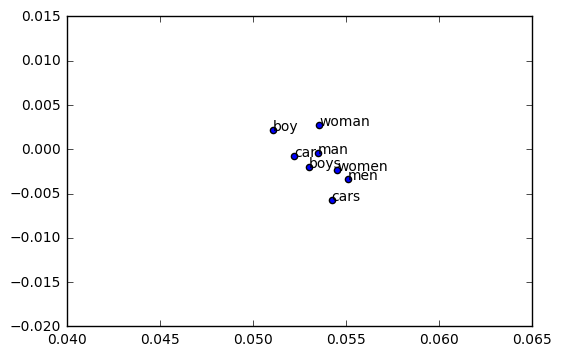

In [328]:
import matplotlib.pyplot as plt
import pylab

%matplotlib inline

plt.scatter(x, y)

for i, name in enumerate(vocabs):
    plt.annotate(name, (x[i],y[i]))
plt.autoscale(enable=True)
plt.show()